Our Image Classification AI Model is a sophisticated deep learning system designed to analyze and classify images based on the emotions they convey, specifically distinguishing between happiness and sadness.

For image classification tasks, Convolutional Neural Networks (CNNs) are commonly employed. CNNs are well-suited for tasks involving image recognition because they can automatically learn hierarchical representations of features from images. Key components of a typical CNN architecture include convolutional layers for feature extraction, pooling layers for down-sampling, and fully connected layers for classification.

1.installing tensorflow 

In [ ]:
!pip install tensorflow tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [ ]:
import tensorflow as tf
import os

In [4]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import imghdr

In [7]:
data_dir = 'data' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

2. Loading Data

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

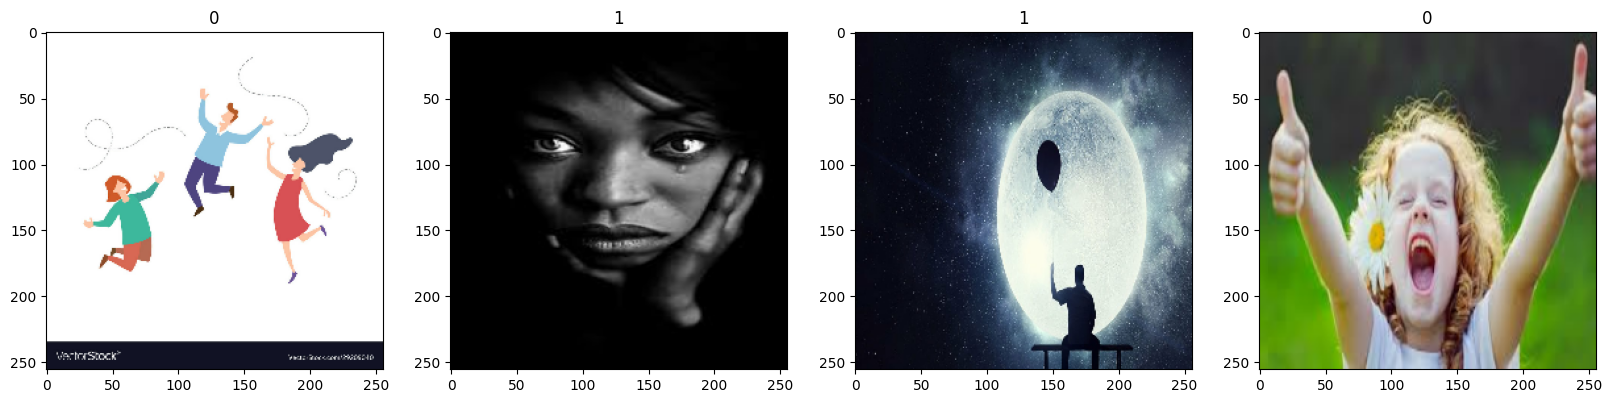

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

3.Scale Data

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

4. Split Data

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

7

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

5. Build Deep Learning Model

In [ ]:
train

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

6. Training the model

In [26]:
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 738ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 2/20
7/7 [==============================] - 7s 755ms/step - loss: 0.0172 - accuracy: 0.9911 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 7s 743ms/step - loss: 0.0176 - accuracy: 0.9955 - val_loss: 0.0523 - val_accuracy: 0.9844
Epoch 4/20
7/7 [==============================] - 7s 734ms/step - loss: 0.0323 - accuracy: 0.9866 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 7s 734ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0152 - val_accuracy: 0.9844
Epoch 6/20
7/7 [==============================] - 7s 751ms/step - loss: 0.0081 - accuracy: 0.9955 - val_loss: 0.0247 - val_accuracy: 0.9844
Epoch 7/20
7/7 [==============================] - 7s 747ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9844
Epoch 8/20
7/7 [====

7. Plot Performance-ploting the loss and acuracy curve

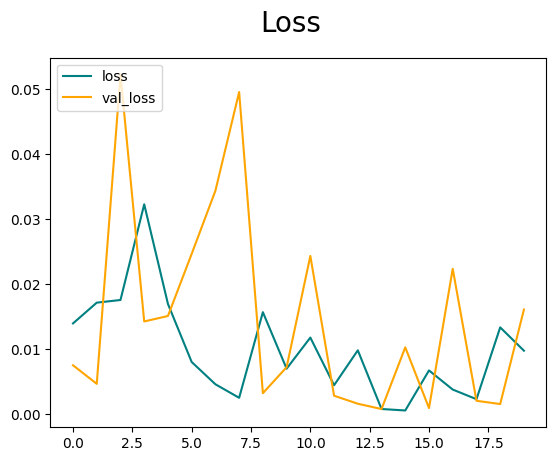

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

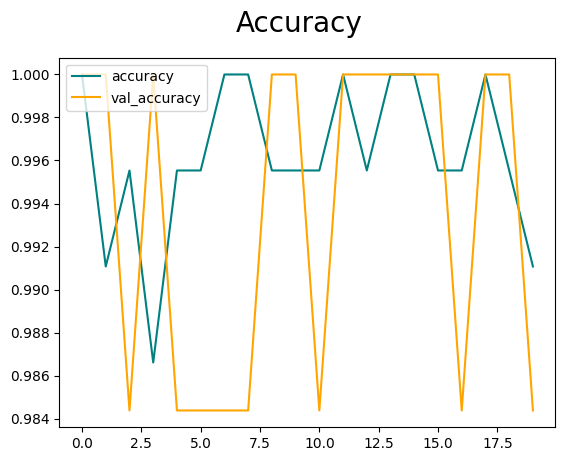

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

8.Evaluate

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 672ms/step


In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


9. Testing the model

In [36]:
import cv2

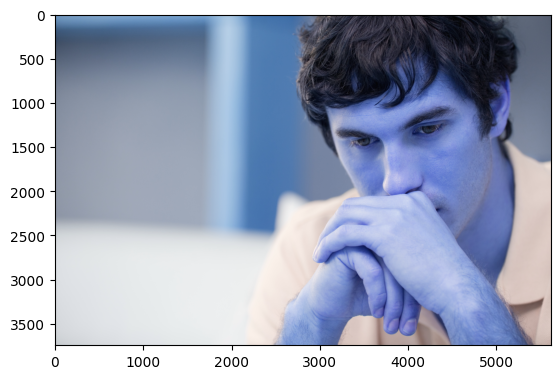

In [37]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

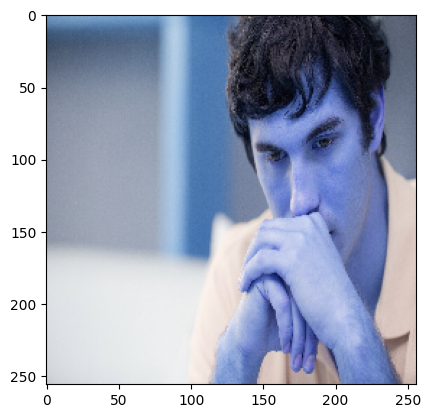

In [38]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [41]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


10.installing gradio and creating gradio interface

In [ ]:
pip install gradio


gradio interface-

Instructions: ( first run the public url in your browser to access the image classifiacation application )

1. Upload an image using the "Browse" button.
2. The model will process the image and provide its prediction.
3. The predicted emotion will be displayed as either "Happy" or "Sad."

In [46]:
import gradio as gr
from PIL import Image
import numpy as np


def predict_emotion_from_image(image):
    
    image = Image.fromarray((image * 255).astype(np.uint8))  
    
    image = image.resize((224, 224))

    
    image_array = np.array(image)

   
    yhat = np.random.rand() 

    if yhat > 0.5:
        prediction = 'Sad'
    else:
        prediction = 'Happy'

    return prediction

iface = gr.Interface(
    fn=predict_emotion_from_image,
    inputs=gr.Image(image_mode="RGB"), 
    outputs="text"
)

iface.launch(share=True)  


C:\Users\User\ImageClassification\imageclassification\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://37a30ffa7443b9ad44.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
